In [1]:
import numpy as np
import xarray as xr
from cmocean import cm as cmo  
from glob import glob
import matplotlib.pyplot as plt

%matplotlib inline

### Load glider data

In [2]:
filelist=[]
for files in glob('../data/Gliders/Glider_vert_gridded_spice*.nc'):
    #print(files)
    filelist.append(files)
    filelist.sort()
missions=[]
for glid in range(0,len(filelist)):
    Gdr = xr.open_dataset(filelist[glid])
    missions.append(Gdr)
    
Gdr = xr.concat(missions, dim = 'mission')
Gdr = Gdr.where((Gdr.dive_lat<-31.5) & (Gdr.dive_lat>-34) & (Gdr.bathydepth>-200),drop=True)
Gdr_s = Gdr.where(Gdr.dive_lat<-32.5)

### Define wet vs dry missions

In [3]:
vwet_missions = [5,12,31,36,40]
dry_missions = [0,1,2,3,4,7,8,9,11,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,37,38,39,41]

# Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


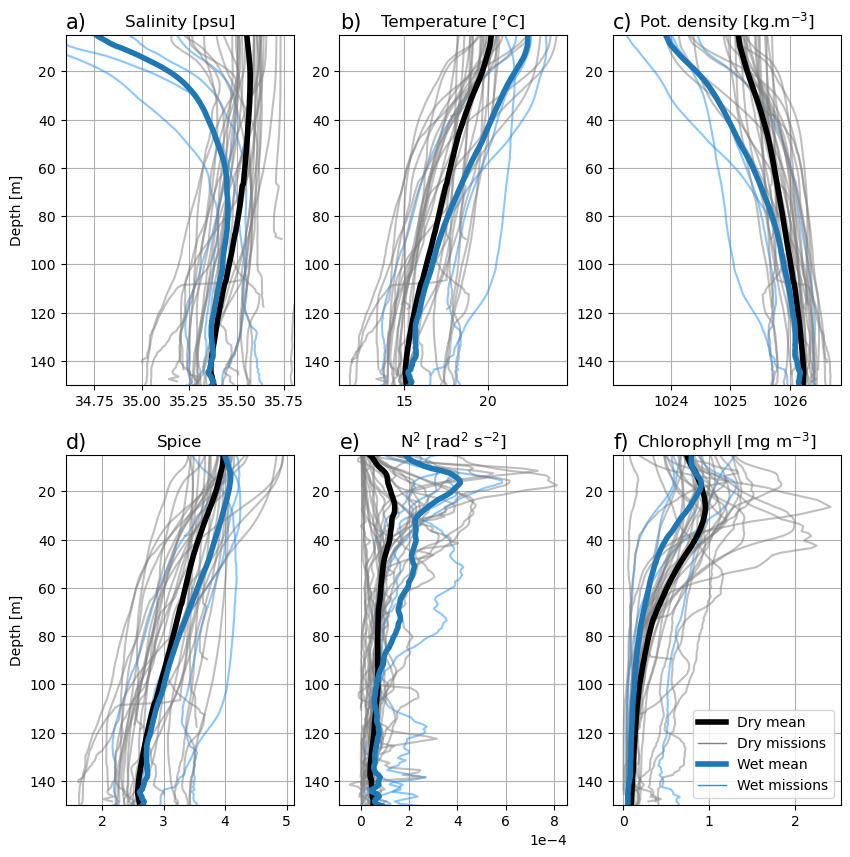

In [ ]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(231)

for i in vwet_missions:
    Gdr_s.sel(mission=i).PSAL_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).PSAL_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).PSAL_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).PSAL_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')

plt.xlim(34.6,35.8)
plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('')
plt.ylabel('Depth [m]')
plt.title('Salinity [psu]')
ax1.text(.001, 1.02, 'a)',transform=ax1.transAxes, fontsize=15)

########################################################################
ax2 = plt.subplot(232)

for i in vwet_missions:
    Gdr_s.sel(mission=i).TEMP_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).TEMP_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).TEMP_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).TEMP_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')

#plt.xlim(34.6,35.8)
plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('')
plt.xlabel('')
plt.title('Temperature [°C]')
ax2.text(.001, 1.02, 'b)',transform=ax2.transAxes, fontsize=15)
#######################################################################
ax3 = plt.subplot(233)

for i in vwet_missions:
    Gdr_s.sel(mission=i).potential_density_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).potential_density_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).potential_density_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).potential_density_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')


plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('')
plt.xlabel('')
plt.title('Pot. density [kg.m$^{-3}$]')
ax3.text(.001, 1.02, 'c)',transform=ax3.transAxes, fontsize=15)

########################################################################
ax4 = plt.subplot(234)

for i in vwet_missions:
    Gdr_s.sel(mission=i).SPICE_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).SPICE_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).SPICE_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).SPICE_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')

#plt.xlim(34.6,35.8)
plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel('')
plt.ylabel('Depth [m]')
plt.title('Spice')
ax4.text(.001, 1.02, 'd)',transform=ax4.transAxes, fontsize=15)

###############################################
ax5 = plt.subplot(235)

for i in vwet_missions:
    Gdr_s.sel(mission=i).BRUNTV_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).BRUNTV_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).BRUNTV_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).BRUNTV_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')

#plt.xlim(34.6,35.8)
plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('')
plt.xlabel('')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('N$^2$ [rad$^2$ s$^{-2}]$')
ax5.text(.001, 1.02, 'e)',transform=ax5.transAxes, fontsize=15)

###############################################
ax6 = plt.subplot(236)

for i in vwet_missions:
    Gdr_s.sel(mission=i).CPHL_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='dodgerblue'
                                                             ,alpha=.5
                                                             ,label='extreme wet')

for i in dry_missions:
    Gdr_s.sel(mission=i).CPHL_vert_binned.mean('PROFILE').plot(y='PRES'
                                                             ,color='grey'
                                                             ,alpha=.5
                                                             ,label='dry')

Gdr_s.sel(mission=dry_missions).CPHL_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                ,color='black'
                                                                                ,linewidth=4
                                                                                ,label='dry')
Gdr_s.sel(mission=vwet_missions).CPHL_vert_binned.mean(['PROFILE','mission']).plot(y='PRES'
                                                                                 ,color='tab:blue'
                                                                                 ,linewidth=4
                                                                                 ,label='extreme wet')

#plt.xlim(34.6,35.8)
plt.ylim(5,150)
plt.gca().invert_yaxis()
plt.grid()
plt.ylabel('')
plt.xlabel('')
plt.title('Chlorophyll [mg m$^{-3}$]')
ax6.text(.001, 1.02, 'f)',transform=ax6.transAxes, fontsize=15)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=4),
                Line2D([0], [0], color='grey', lw=1),
                Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='dodgerblue', lw=1)]

ax6.legend(custom_lines, ['Dry mean','Dry missions' ,'Wet mean', 'Wet missions'])
#plt.savefig("Fig_9.eps", format='eps', bbox_inches='tight')